In [1]:
sc

In [2]:
from pyspark.sql import SQLContext
import time
from generator_images import captcha_generator as gen
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sys
import cProfile

In [3]:
chars = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy"
width, height, n_len, n_class = 140, 44, 6, len(chars)

In [4]:
sqlContext = SQLContext(sc)

In [ ]:
sqlContext.sql("DROP TABLE images4")

In [6]:
sqlContext.sql("CREATE EXTERNAL TABLE images4 (id STRING COMMENT 'id of images', mat ARRAY<ARRAY<ARRAY<ARRAY<BIGINT>>>> \
COMMENT 'array of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images4'")
sqlContext.sql("DESCRIBE TABLE images4").show()

+--------+--------------------+-------------+
|col_name|           data_type|      comment|
+--------+--------------------+-------------+
|      id|              string| id of images|
|     mat|array<array<array...|array of list|
+--------+--------------------+-------------+



In [7]:
start_time = time.time()
num = 0
image = gen(width=width, height=height)
while num < 3:
    X, y = image.next()
    for i, x in enumerate(X):
        newimage = sqlContext.createDataFrame([(64*num+i, [x.tolist()])], ['id', 'mat'])
        newimage.write.mode('append').insertInto('images4')
    num += 1
    end_time = time.time()
    print '--------------------------%d------------------------'%num
    print 'the total time is', end_time - start_time
    print 'the average time is', (end_time - start_time)/64.0 /num

--------------------------1------------------------
the total time is 72.0452182293
the average time is 1.12570653483
--------------------------2------------------------
the total time is 114.763409138
the average time is 0.896589133888
--------------------------3------------------------
the total time is 165.222885132
the average time is 0.860535860062


In [8]:
image = gen(width=width, height=height)
start_time = time.time()
for _ in range(100):
    X, y = image.next()
end_time = time.time()
print 'the average time is ', (end_time - start_time)/100

the average time is  0.699351849556


In [9]:
start_time = time.time()
num = 0
image = gen(width=width, height=height)
while num < 10:
    X, y = image.next()
    newimage = sqlContext.createDataFrame([(num, X.tolist())], ['id', 'mat'])
    newimage.write.mode('append').insertInto('images4')
    num += 1
    end_time = time.time()
    print '--------------------------%d----------------------------'%num
    print 'the total time is', end_time - start_time
    print 'the average time is', (end_time - start_time)/64.0 /num

--------------------------1----------------------------
the total time is 4.45962405205
the average time is 0.0696816258132
--------------------------2----------------------------
the total time is 8.82574605942
the average time is 0.0689511410892
--------------------------3----------------------------
the total time is 13.2580990791
the average time is 0.0690525993705
--------------------------4----------------------------
the total time is 18.4559130669
the average time is 0.0720934104174
--------------------------5----------------------------
the total time is 23.0503330231
the average time is 0.0720322906971
--------------------------6----------------------------
the total time is 27.7171730995
the average time is 0.07218013828
--------------------------7----------------------------
the total time is 32.772714138
the average time is 0.0731533797724
--------------------------8----------------------------
the total time is 37.201488018
the average time is 0.0726591562852
------------

In [10]:
dataset = sqlContext.sql("SELECT mat FROM images4 WHERE id==1")

In [11]:
dataset.take(3)

[Row(mat=[[[[176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [105, 91, 48], [176, 173, 173], [176, 173, 173], [176, 173, 173], [45, 83, 69], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176, 173, 173], [45, 83, 69], [176, 173, 173], [176, 173, 173], [176, 173, 173], [176

In [12]:
dataset.take(3)[0]['mat']

[[[[176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [105, 91, 48],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [45, 83, 69],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176, 173, 173],
   [176

In [13]:
type(dataset.take(3)[0]['mat'])

list

In [14]:
image0 = np.array(dataset.take(3)[0]['mat'])

In [15]:
image0.shape

(1, 44, 140, 3)

In [16]:
img = image0.reshape((44, 140, 3))

In [17]:
# 注意这里的图像数据类型
img = img.astype(np.uint8)

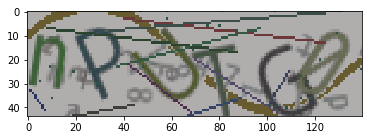

In [18]:
plt.imshow(img)
plt.show()

In [19]:
sqlContext.sql("DROP TABLE images4")

DataFrame[]

In [20]:
sqlContext.sql("CREATE EXTERNAL TABLE images4 (id STRING COMMENT 'id of images', mat ARRAY<ARRAY<ARRAY<ARRAY<BIGINT>>>> \
COMMENT 'array of list') COMMENT \
'This is used to store images' ROW FORMAT DELIMITED \
FIELDS TERMINATED BY '\t' STORED AS TEXTFILE LOCATION 'hdfs://master:9000/user/hive/images5'")
sqlContext.sql("DESCRIBE TABLE images4").show()

+--------+--------------------+-------------+
|col_name|           data_type|      comment|
+--------+--------------------+-------------+
|      id|              string| id of images|
|     mat|array<array<array...|array of list|
+--------+--------------------+-------------+



In [22]:
#sqlContext.sql("LOAD DATA INPATH 'hdfs://master:9000/user/hive/images4' INTO TABLE images4")

In [23]:
dataset = sqlContext.sql("SELECT mat FROM images4 WHERE id=1")

In [24]:
dataset.show()

+--------------------+
|                 mat|
+--------------------+
|[WrappedArray(Wra...|
|[WrappedArray(Wra...|
+--------------------+



In [25]:
sys.getsizeof(dataset.show())

+--------------------+
|                 mat|
+--------------------+
|[WrappedArray(Wra...|
|[WrappedArray(Wra...|
+--------------------+



16

In [26]:
sys.getsizeof(sqlContext)

64

In [27]:
def test():
    start_time = time.time()
    num = 0
    image = gen(width=width, height=height)
    while num < 10:
        X, y = image.next()
        newimage = sqlContext.createDataFrame([(num, X.tolist())], ['id', 'mat'])
        newimage.write.mode('append').insertInto('images4')
        num += 1
        end_time = time.time()
        print '--------------------------%d----------------------------'%num
        print 'the total time is', end_time - start_time
        print 'the average time is', (end_time - start_time)/64.0 /num

In [28]:
cProfile.run('test()')

--------------------------1----------------------------
the total time is 4.70379805565
the average time is 0.0734968446195
--------------------------2----------------------------
the total time is 9.42161488533
the average time is 0.0736063662916
--------------------------3----------------------------
the total time is 14.3692638874
the average time is 0.0748399160802
--------------------------4----------------------------
the total time is 18.5622529984
the average time is 0.0725088007748
--------------------------5----------------------------
the total time is 23.4608130455
the average time is 0.0733150407672
--------------------------6----------------------------
the total time is 27.8298299313
the average time is 0.072473515446
--------------------------7----------------------------
the total time is 32.6407980919
the average time is 0.0728589243123
--------------------------8----------------------------
the total time is 37.5777590275
the average time is 0.0733940606005
---------

In [31]:
sqlContext.sql("DROP TABLE images5")

AnalysisException: u"Table or view 'images5' not found in database 'default';"